In [1]:
# Basic libraries
import pymysql
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # great library for visualisating the distribution of nulls!
import statsmodels.api as sm

# Hypothesis Testing
import math
from scipy import stats
from scipy.stats import ttest_ind

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn .metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway

#Additional binary classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Other
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
%matplotlib inline
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data= pd.read_csv('measurements.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [4]:
data.columns= data.columns.str.replace(' ', '_')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  13 non-null     object
 11  refill_gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


<AxesSubplot:>

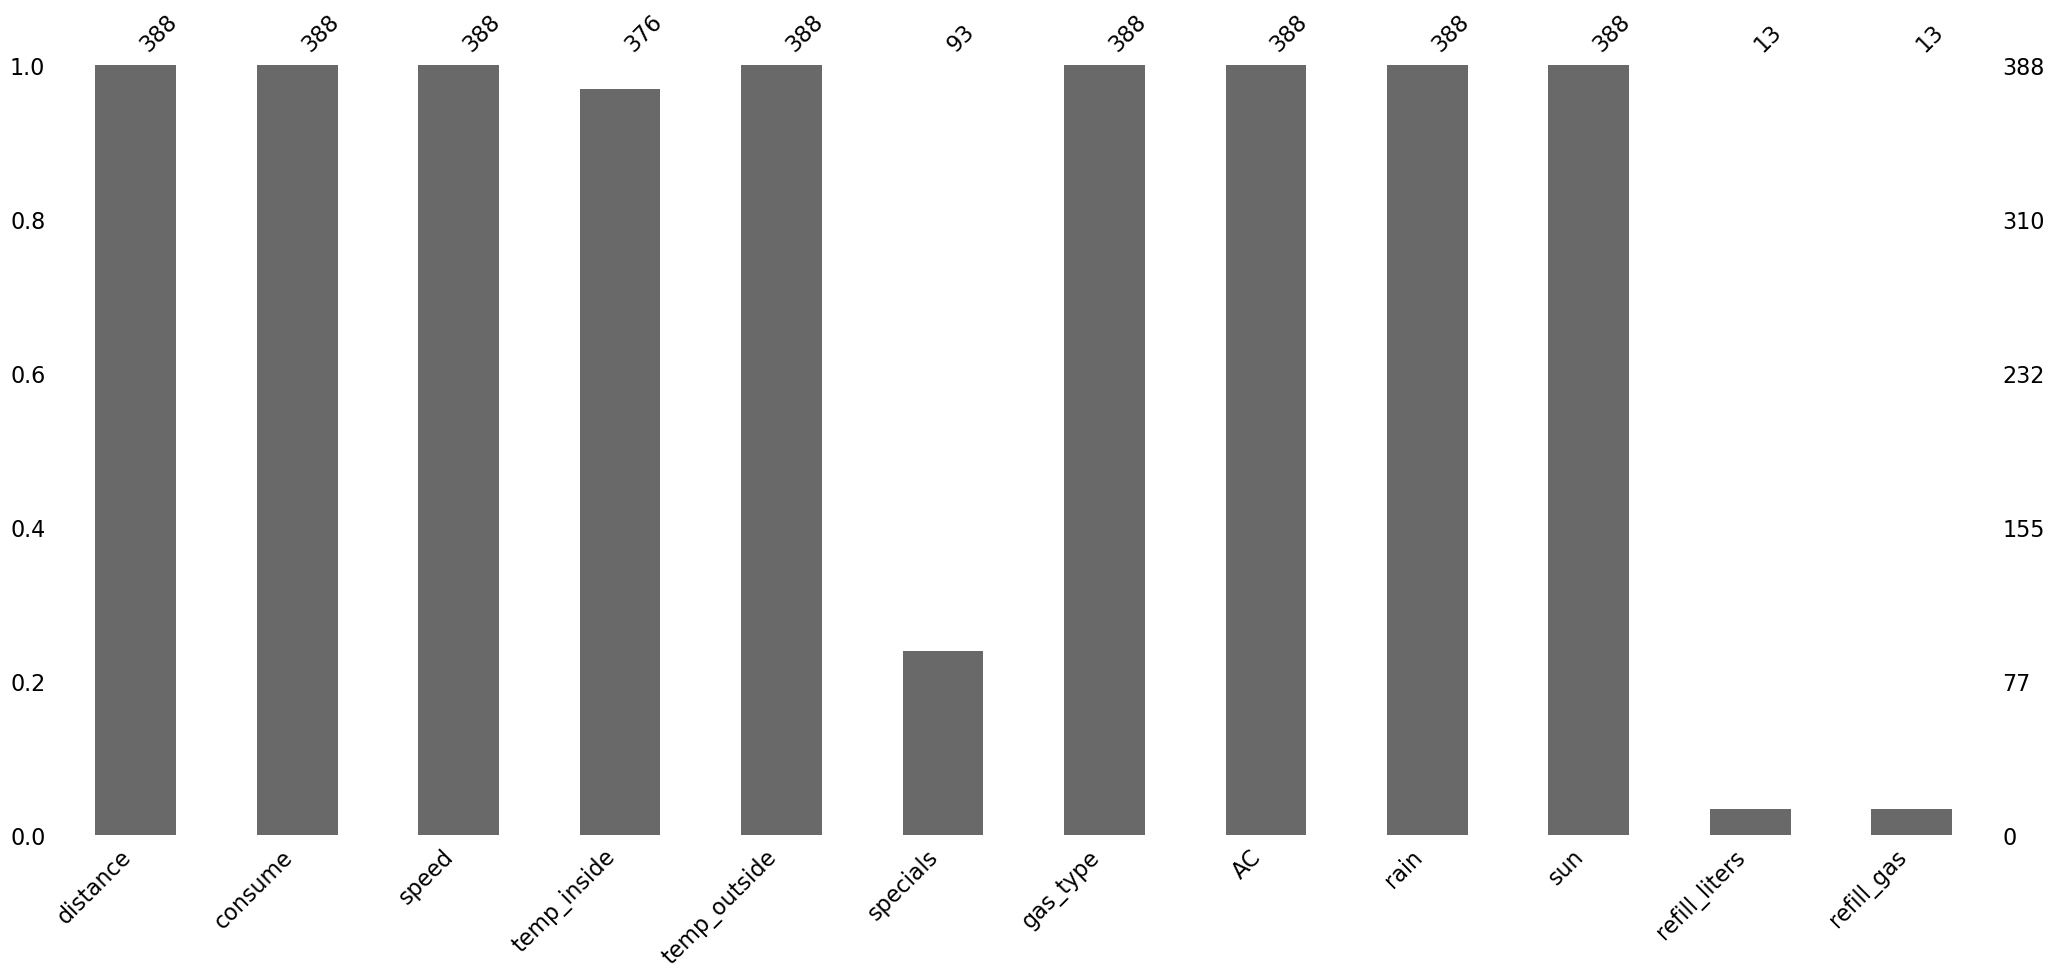

In [5]:
msno.bar(data)

In [6]:
data['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [7]:
data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [8]:
nan_count= data['specials'].isna().sum()
print(nan_count)

295


<AxesSubplot:>

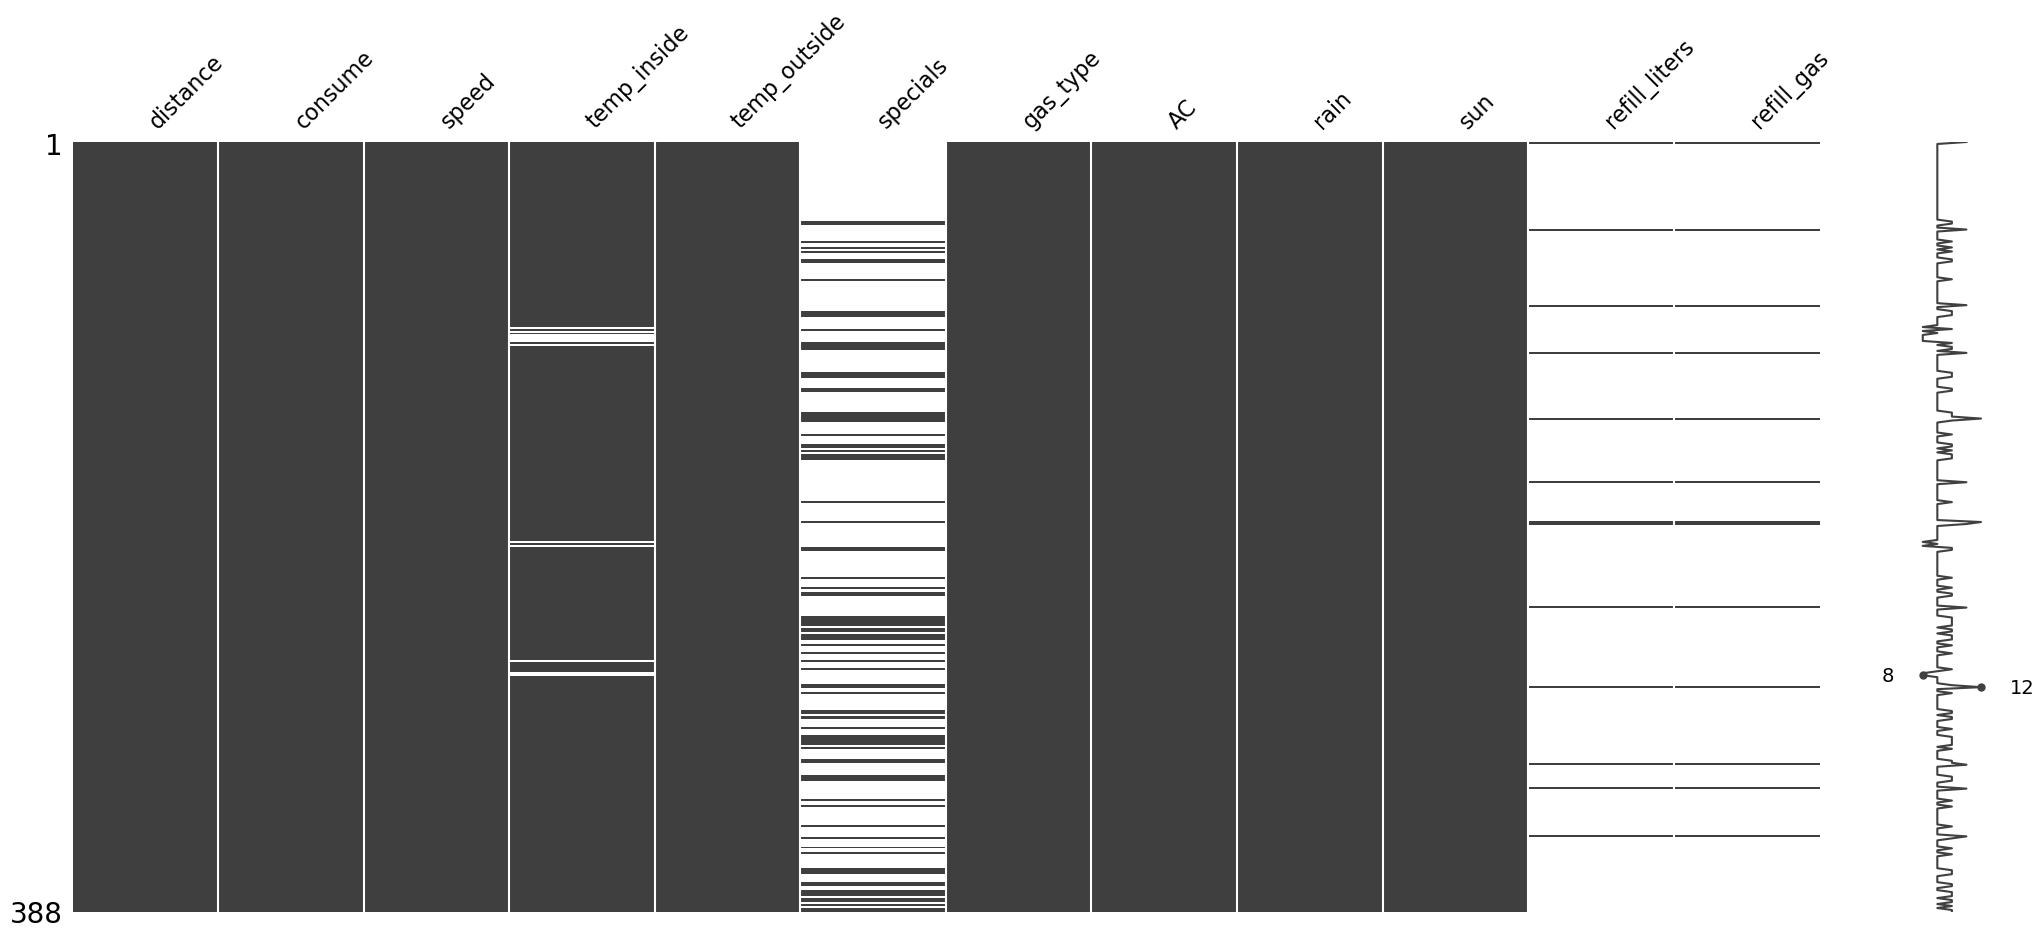

In [9]:
msno.matrix(data)

In [10]:
condition = (data['specials'].notna()) & ((data['AC'] ==1) | (data['rain']==1) | (data['sun']==1))
result= data[condition]
print(result)


    distance consume  speed temp_inside  temp_outside            specials  \
40      12,4       4     55        21,5             7             AC rain   
41       4,5       5     29        21,5             7                  AC   
50      11,8     5,1     29        21,5             5                rain   
53      13,1     6,1     46        21,5             6                rain   
55     153,5     4,9     82        21,5             3                rain   
59      12,3     5,7     52        21,5             8                rain   
60       2,9     7,9     18        21,5             9             AC rain   
69      11,8     4,5     37        21,5             4                  AC   
85      12,3     6,2     58          20            11                rain   
86      13,2     4,3     51          20            11                rain   
87        13       5     45          20            11                rain   
94      11,8     5,9     21          20             9             AC rain   

In [11]:
count_rows= condition.sum()
print("Number of rows where 'specials' and one of the dummy variables 'AC', 'rain', or sun are filled in simutaneously:", count_rows)

Number of rows where 'specials' and one of the dummy variables 'AC', 'rain', or sun are filled in simutaneously: 92


In [12]:
non_nan_count= data['specials'].notna().sum()
print(non_nan_count)

93


In [13]:
condition_weird = (data['specials'].notna()) & ((data['AC'] ==0) & (data['rain']==0) & (data['sun']==0))
result1= data[condition_weird]
print(result1)


    distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
334    129,7     4,6     58          24            21       ac      E10   0   

     rain  sun refill_liters refill_gas  
334     0    0           NaN        NaN  


In [14]:
## According to the author of the data set, "specials is a remark if it was raining, snowing or if the climatization was on ("AC")", and the rain/sun/AC reflects that as well, so the entire column can be dropped. However, line 334 needs to be imputed with the correct value, in other words 'AC' should be 1.

In [15]:
data= data.drop(columns=['specials'])
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,E10,0,0,0,NaN,NaN


In [16]:
data.at[334, 'AC']= 1
print(data.loc[334]) # to confirm if the incorrect value has been successfully imputed

distance         129,7
consume            4,6
speed               58
temp_inside         24
temp_outside        21
gas_type           E10
AC                   1
rain                 0
sun                  0
refill_liters      NaN
refill_gas         NaN
Name: 334, dtype: object


In [17]:
# I was unable to find any description regarding the variables refill_gas and refill liters, but a quick glance at the data shows that refill_gas reproduces the same value as gas_type, provided that reill liters is filled as well. Let's test that with a boolean mask!

In [18]:
mask = data['refill_liters'].notna() & data['refill_gas'].notna()
condition2= (data['refill_gas'][mask] == data['gas_type'][mask])
matchy_matchy = condition2.sum()
print(matchy_matchy)

13


In [19]:
data['refill_gas'].notna().sum()

13

In [20]:
# From the results above, we can conclude that refill_gas does provide any info that gas_type doesn't provide. Therefore a new dummy variable showing that refilling has be done should replace it.

In [21]:
data['refill'] = data['refill_liters'].notna().astype(int) # another boolean mask
print(data.refill)


0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     1
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     1
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    0
109    0
110    0
1

In [22]:
data= data.drop(columns=['refill_liters', 'refill_gas'])
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill
0,28,5,26,"21,5",12,E10,0,0,0,1
1,12,"4,2",30,"21,5",13,E10,0,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0,0


In [23]:
data.rename(columns={'AC': 'ac'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   ac            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
 9   refill        388 non-null    int32 
dtypes: int32(1), int64(5), object(4)
memory usage: 28.9+ KB


In [24]:
data['temp_inside'] = data['temp_inside'].fillna(25).str.replace(',', '.').astype(float)


In [25]:
data['distance'] = data['distance'].str.replace(',', '.').astype(float)

In [26]:
data['consume'] = data['consume'].str.replace(',', '.').astype(float)

In [27]:
data.info() # i will encode gas_type later 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   ac            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
 9   refill        388 non-null    int32  
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 28.9+ KB


In [28]:
lastnulls= data[data['temp_inside'].isnull()]
print(lastnulls)

     distance  consume  speed  temp_inside  temp_outside gas_type  ac  rain  \
93       12.4      4.7     43          NaN            10     SP98   0     0   
95       11.8      5.3     52          NaN            11     SP98   0     0   
97       15.7      5.3     33          NaN             9     SP98   0     0   
98       12.9      5.7     35          NaN             9     SP98   0     0   
99        6.4      4.4     37          NaN            10     SP98   0     0   
100       5.3      4.1     34          NaN             9     SP98   0     0   
102      18.8      5.0     62          NaN             9     SP98   0     1   
201      22.2      3.8     42          NaN            15     SP98   0     0   
203      12.6      4.1     33          NaN            17     SP98   0     0   
261      24.5      3.9     50          NaN            15      E10   0     0   
267      22.9      4.0     29          NaN            21      E10   0     0   
268      16.0      3.8     42          NaN          

In [29]:
# NaNs in temp_inside indicate that the AC was shut off but this also by extension implies that the temperature inside is comfortable. Therefore we can safely impute all NaNs with 25C, which is the room temperature

In [30]:
data['temp_inside'] = data['temp_inside'].fillna(25)
data['temp_inside'].isna().sum()

0

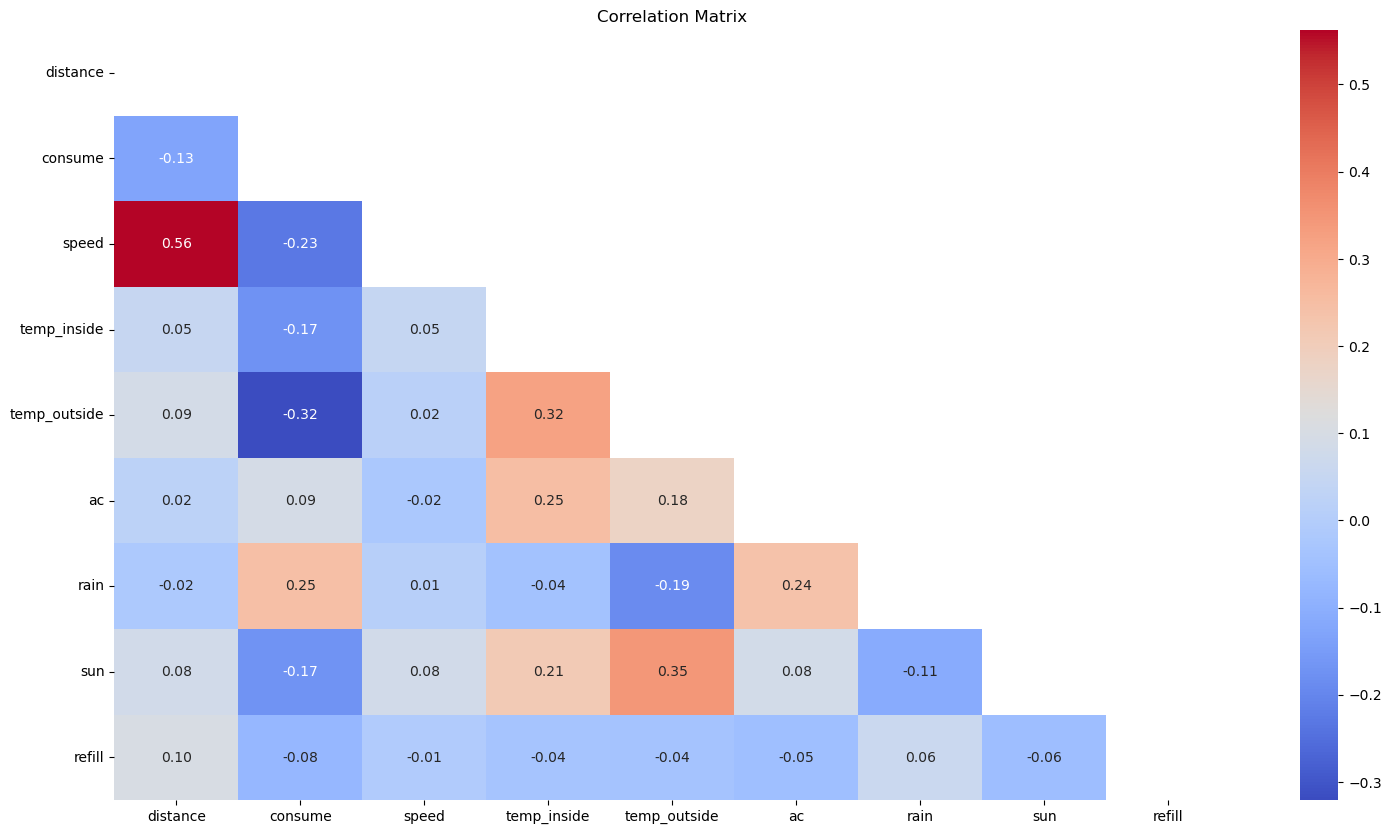

In [31]:
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [32]:
#no evidence of multicollinearity

In [33]:
#EDA

In [34]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,refill
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,22.024485,11.358247,0.079897,0.123711,0.082474,0.033505
std,22.667837,1.033172,13.598524,1.128120,6.991542,0.271484,0.329677,0.275441,0.180184
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
num = data.select_dtypes(np.number)
num.head()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,refill
0,28.0,5.0,26,21.5,12,0,0,0,1
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0


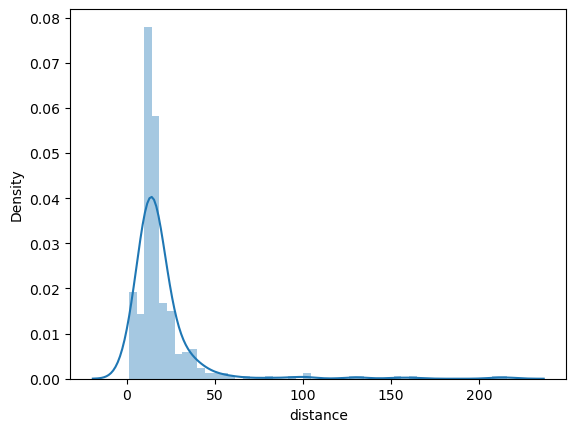

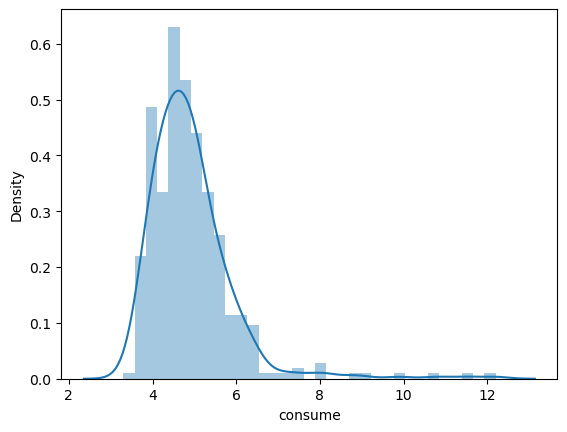

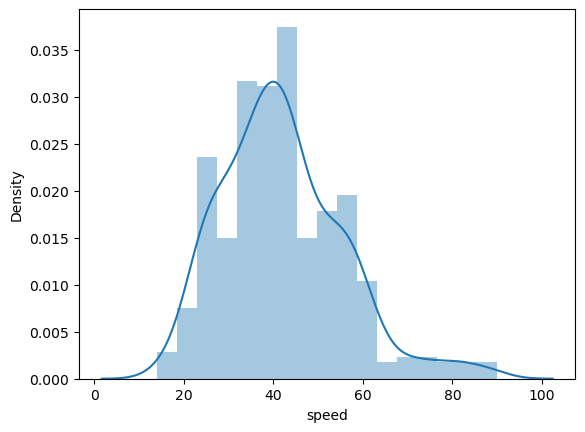

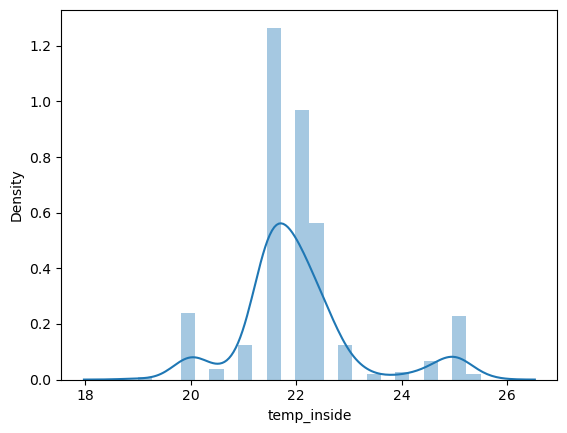

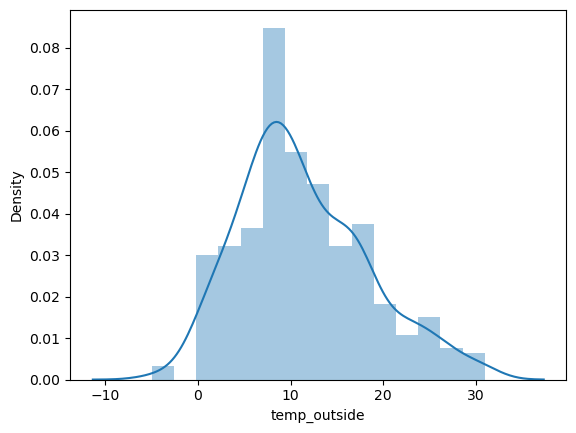

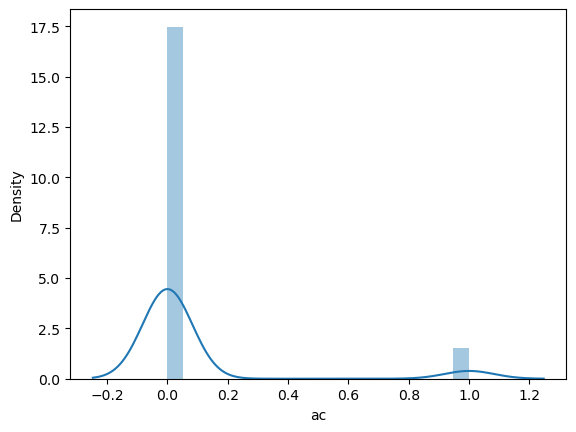

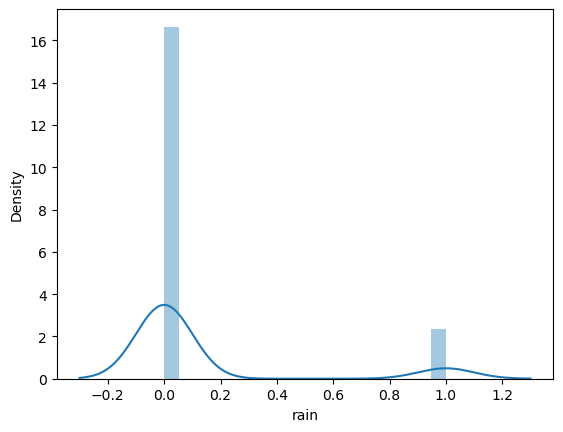

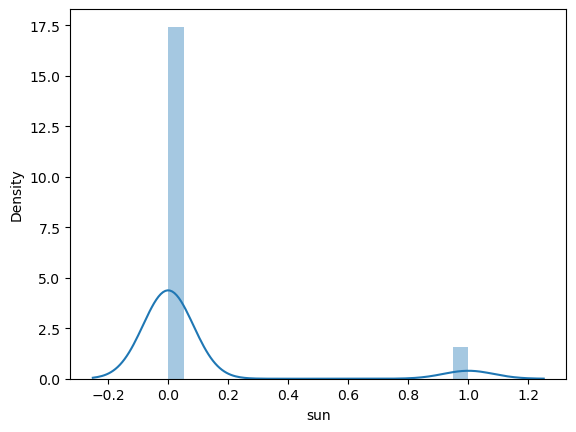

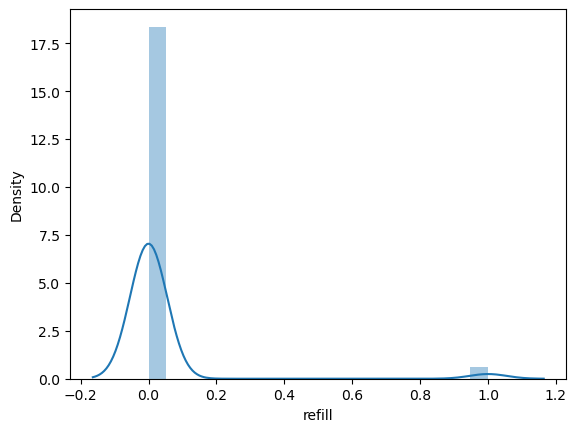

In [36]:
for column in num.columns:
    sns.distplot(data[column])
    plt.show()

In [37]:
data['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [38]:
# Distance per liter

In [39]:
sp98_data = data[data['gas_type'] == 'SP98'].copy()

In [40]:
e10_data = data[data['gas_type'] == 'E10'].copy()

In [41]:
sp98_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 44 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      228 non-null    float64
 1   consume       228 non-null    float64
 2   speed         228 non-null    int64  
 3   temp_inside   228 non-null    float64
 4   temp_outside  228 non-null    int64  
 5   gas_type      228 non-null    object 
 6   ac            228 non-null    int64  
 7   rain          228 non-null    int64  
 8   sun           228 non-null    int64  
 9   refill        228 non-null    int32  
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 18.7+ KB


In [42]:
sp98_data['distance_per_liter'] = sp98_data['distance'] / sp98_data['consume']
sp98_data['distance_per_liter'].describe()


count    228.000000
mean       4.008745
std        4.917587
min        0.113043
25%        2.296296
50%        2.957323
75%        4.210526
max       45.869565
Name: distance_per_liter, dtype: float64

In [43]:
e10_data['distance_per_liter'] = e10_data['distance'] / e10_data['consume']
e10_data['distance_per_liter'].describe()

count    160.000000
mean       4.471731
std        4.364588
min        0.157407
25%        2.381485
50%        3.218202
75%        4.590217
max       28.326087
Name: distance_per_liter, dtype: float64

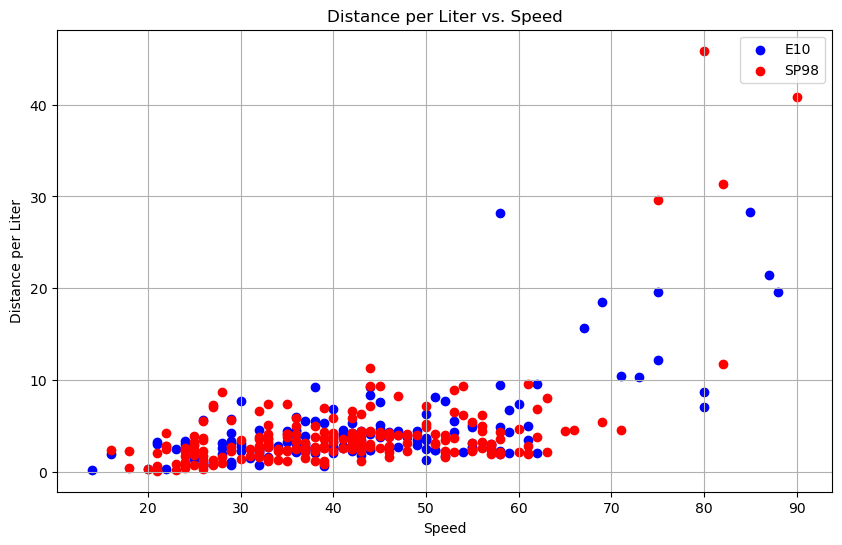

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(e10_data['speed'], e10_data['distance_per_liter'], color='blue', label='E10')
plt.scatter(sp98_data['speed'], sp98_data['distance_per_liter'], color='red', label='SP98')
plt.xlabel('Speed')
plt.ylabel('Distance per Liter')
plt.title('Distance per Liter vs. Speed')
plt.legend()
plt.grid()
plt.show()


In [45]:
distance_per_liter_e10 = e10_data['distance_per_liter']
distance_per_liter_sp98 = sp98_data['distance_per_liter']

# Perform ANOVA test
f_statistic, p_value = f_oneway(distance_per_liter_e10, distance_per_liter_sp98)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Determine if the difference is statistically significant
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

F-Statistic: 0.9132498083470372
P-Value: 0.33985172105151706
The difference is not statistically significant.


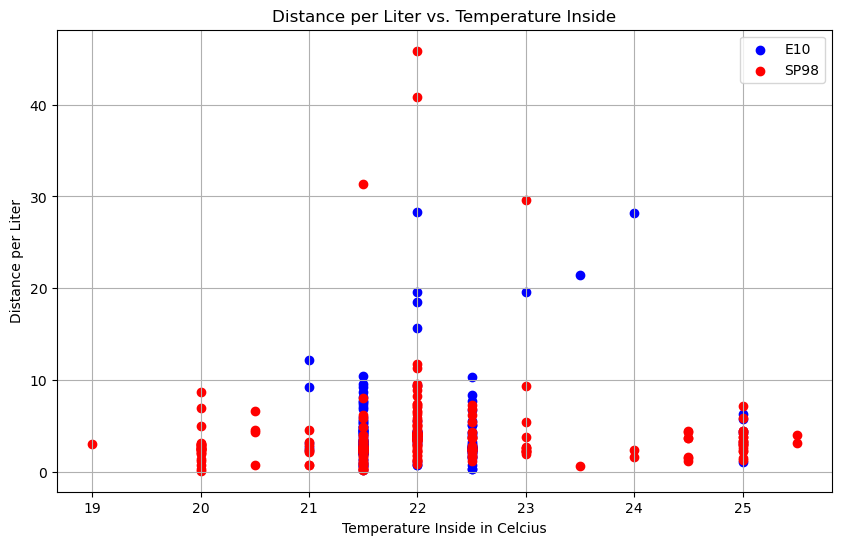

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(e10_data['temp_inside'], e10_data['distance_per_liter'], color='blue', label='E10')
plt.scatter(sp98_data['temp_inside'], sp98_data['distance_per_liter'], color='red', label='SP98')
plt.xlabel('Temperature Inside in Celcius')
plt.ylabel('Distance per Liter')
plt.title('Distance per Liter vs. Temperature Inside')
plt.legend()
plt.grid()
plt.show()


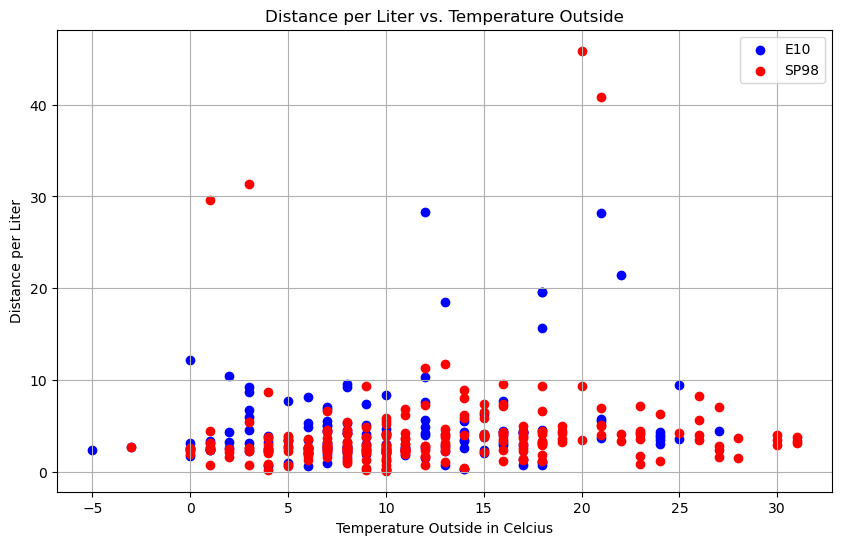

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(e10_data['temp_outside'], e10_data['distance_per_liter'], color='blue', label='E10')
plt.scatter(sp98_data['temp_outside'], sp98_data['distance_per_liter'], color='red', label='SP98')
plt.xlabel('Temperature Outside in Celcius')
plt.ylabel('Distance per Liter')
plt.title('Distance per Liter vs. Temperature Outside')
plt.legend()
plt.grid()
plt.show()


In [48]:
std_dev_by_temp1 = sp98_data.groupby('temp_outside')['distance_per_liter'].std()
average_std_dev1 = std_dev_by_temp1.mean()
print("Average Standard Deviation:", average_std_dev1)



Average Standard Deviation: 3.5355175995697334


In [49]:
std_dev_by_temp2 = e10_data.groupby('temp_outside')['distance_per_liter'].std()
average_std_dev2 = std_dev_by_temp2.mean()
print("Average Standard Deviation:", average_std_dev2)

Average Standard Deviation: 3.336957271889276


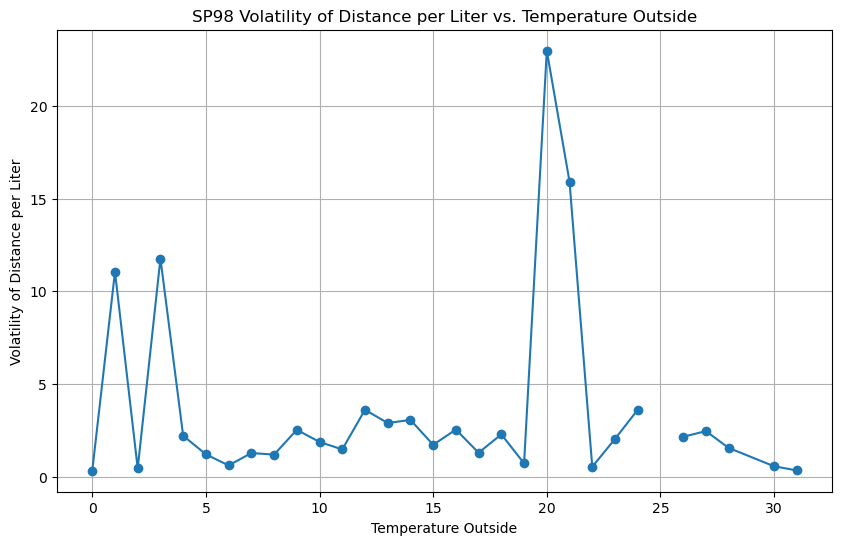

In [50]:
# Plot the volatility of distance per liter against temperature changes
plt.figure(figsize=(10, 6))
plt.plot(std_dev_by_temp1.index, std_dev_by_temp1.values, marker='o')
plt.xlabel('Temperature Outside')
plt.ylabel('Volatility of Distance per Liter')
plt.title('SP98 Volatility of Distance per Liter vs. Temperature Outside')
plt.grid()
plt.show()

In [51]:
std_dev_by_temp2 = e10_data.groupby('temp_outside')['distance_per_liter'].std()
average_std_dev2 = std_dev_by_temp2.mean()
print("Average Standard Deviation:", average_std_dev2)



Average Standard Deviation: 3.336957271889276


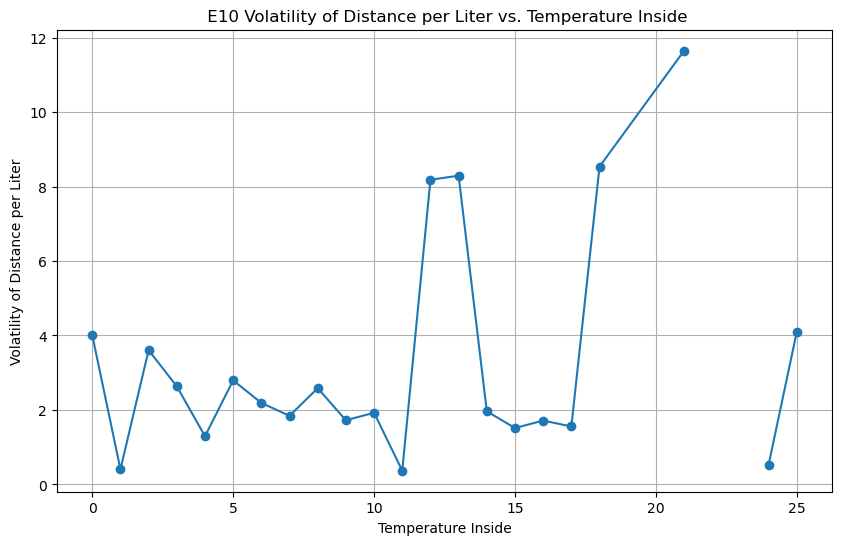

In [52]:
# Plot the volatility of distance per liter against temperature changes
plt.figure(figsize=(10, 6))
plt.plot(std_dev_by_temp2.index, std_dev_by_temp2.values, marker='o')
plt.xlabel('Temperature Inside')
plt.ylabel('Volatility of Distance per Liter')
plt.title(' E10 Volatility of Distance per Liter vs. Temperature Inside')
plt.grid()
plt.show()

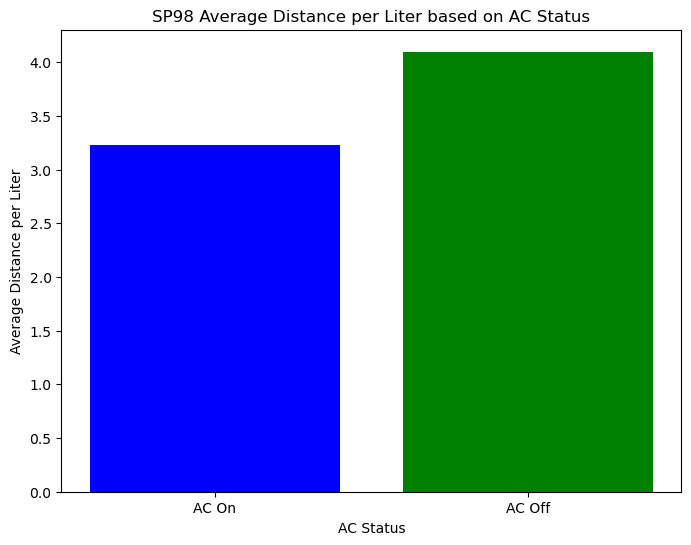

In [53]:
average_distance_ac_on1 = sp98_data[sp98_data['ac'] == 1]['distance_per_liter'].mean()

# Calculate the average distance per liter when AC is off
average_distance_ac_off1 = sp98_data[sp98_data['ac'] == 0]['distance_per_liter'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['AC On', 'AC Off'], [average_distance_ac_on1, average_distance_ac_off1], color=['blue', 'green'])
plt.xlabel('AC Status')
plt.ylabel('Average Distance per Liter')
plt.title('SP98 Average Distance per Liter based on AC Status')
plt.show()

In [54]:
distance_ac_on1 = sp98_data[sp98_data['ac'] == 1]['distance_per_liter']
distance_ac_off1 = sp98_data[sp98_data['ac'] == 0]['distance_per_liter']

# Perform t-test
t_statistic, p_value = ttest_ind(distance_ac_on1, distance_ac_off1)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine if the difference is statistically significant
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

T-Statistic: -0.8056896010741108
P-Value: 0.4212687434018786
The difference is not statistically significant.


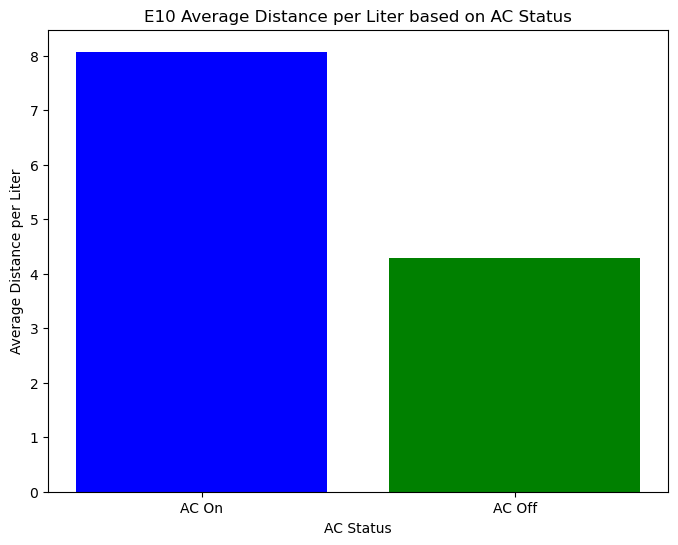

In [55]:
average_distance_ac_on2 = e10_data[e10_data['ac'] == 1]['distance_per_liter'].mean()

# Calculate the average distance per liter when AC is off
average_distance_ac_off2 = e10_data[e10_data['ac'] == 0]['distance_per_liter'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['AC On', 'AC Off'], [average_distance_ac_on2, average_distance_ac_off2], color=['blue', 'green'])
plt.xlabel('AC Status')
plt.ylabel('Average Distance per Liter')
plt.title('E10 Average Distance per Liter based on AC Status')
plt.show()

In [56]:
# Does turning the AC on truly make a difference in terms of distance per liter of E10

In [57]:
distance_ac_on2 = e10_data[e10_data['ac'] == 1]['distance_per_liter']
distance_ac_off2 = e10_data[e10_data['ac'] == 0]['distance_per_liter']

# Perform t-test
t_statistic, p_value = ttest_ind(distance_ac_on2, distance_ac_off2)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine if the difference is statistically significant
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

T-Statistic: 2.4313095091280035
P-Value: 0.016162672116219332
The difference is statistically significant.


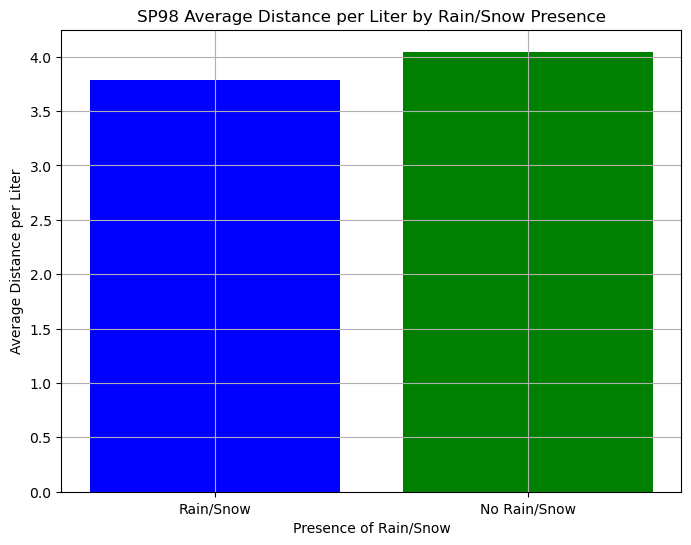

In [58]:
yes_rain1= sp98_data[sp98_data['rain']== 1]['distance_per_liter']
no_rain1= sp98_data[sp98_data['rain']==0]['distance_per_liter']

plt.figure(figsize=(8, 6))

# Convert the Series objects to arrays
yes_rain1_array = yes_rain1.to_numpy()
no_rain1_array = no_rain1.to_numpy()

plt.bar(['Rain/Snow', 'No Rain/Snow'], [yes_rain1_array.mean(), no_rain1_array.mean()], color=['blue', 'green'])
plt.xlabel('Presence of Rain/Snow')
plt.ylabel('Average Distance per Liter')
plt.title('SP98 Average Distance per Liter by Rain/Snow Presence')
plt.grid()
plt.show()


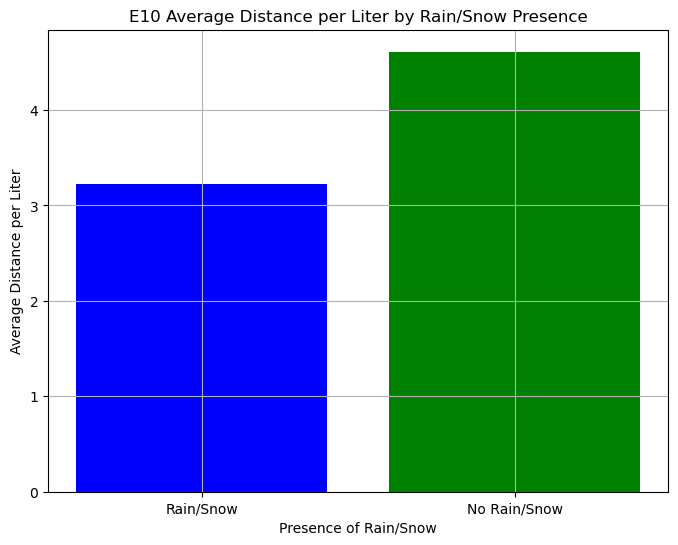

In [59]:
yes_rain2= e10_data[e10_data['rain']== 1]['distance_per_liter']
no_rain2= e10_data[e10_data['rain']==0]['distance_per_liter']

plt.figure(figsize=(8, 6))

# Convert the Series objects to arrays
yes_rain2_array = yes_rain2.to_numpy()
no_rain2_array = no_rain2.to_numpy()

plt.bar(['Rain/Snow', 'No Rain/Snow'], [yes_rain2_array.mean(), no_rain2_array.mean()], color=['blue', 'green'])
plt.xlabel('Presence of Rain/Snow')
plt.ylabel('Average Distance per Liter')
plt.title('E10 Average Distance per Liter by Rain/Snow Presence')
plt.grid()
plt.show()


# Observations from EDA

## The best combustible is broadly defined as the gas type that provides the best distance per liter -- in other words, the best bang for your buck (or just fuel efficiency)!

### In general, E10 has a higher fuel efficiency than SP98, but the difference is not statistically significant. However, the performance of the gas types vary depending on temperature and weather. 

### SP98 is more fuel efficient at higher speeds buit is marginally more sensitive to fluctuations to outside temperature compared to E10. 

### E10, on the other hand, is less sensitive to fluctuations to outside temperature but less fuel efficient when confronted with the presence of snow/rain on the road surface. 

### Whether the AC is turned on or off makes statistically no difference to SP98's fuel efficiency, but it does to E10! Counter intuitively, E10's fuel efficiency increases when the AC is turned on.

In [60]:
# Binary Classification Model

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   ac            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
 9   refill        388 non-null    int32  
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 28.9+ KB


In [62]:
label_encoder= LabelEncoder()

In [63]:
data['gas_type']= label_encoder.fit_transform(data['gas_type'])
data['gas_type'].value_counts()

1    228
0    160
Name: gas_type, dtype: int64

1 = SP98
0 = E10

In [64]:
X= data.drop(columns=['gas_type'])
y= data['gas_type']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # X Y split

In [72]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

# Train and evaluate models
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['E10', 'SP98'])
    
    
    print(f'{name}:')
    print(f'Accuracy = {accuracy:.2f}')
    print(report)
    print('-' * 40)






Logistic Regression:
Accuracy = 0.54
              precision    recall  f1-score   support

         E10       0.50      0.14      0.22        36
        SP98       0.54      0.88      0.67        42

    accuracy                           0.54        78
   macro avg       0.52      0.51      0.45        78
weighted avg       0.52      0.54      0.46        78

----------------------------------------
Decision Tree:
Accuracy = 0.71
              precision    recall  f1-score   support

         E10       0.68      0.69      0.68        36
        SP98       0.73      0.71      0.72        42

    accuracy                           0.71        78
   macro avg       0.70      0.70      0.70        78
weighted avg       0.71      0.71      0.71        78

----------------------------------------
Random Forest:
Accuracy = 0.68
              precision    recall  f1-score   support

         E10       0.70      0.53      0.60        36
        SP98       0.67      0.81      0.73        42

 

In [69]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [70]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6794871794871795
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.56      0.62        36
           1       0.67      0.79      0.73        42

    accuracy                           0.68        78
   macro avg       0.68      0.67      0.67        78
weighted avg       0.68      0.68      0.67        78



In [ ]:
#The lower recall score for E10 is lower may be caused by the skewed sample. To remedy that, we can oversample E10 to see if there are any improvements in classification scores.

In [75]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Train and evaluate models
for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['E10', 'SP98'])
    
    
    print(f'{name}:')
    print(f'Accuracy = {accuracy:.2f}')
    print(report)
    print('-' * 40)



Logistic Regression:
Accuracy = 0.58
              precision    recall  f1-score   support

         E10       0.54      0.58      0.56        36
        SP98       0.62      0.57      0.59        42

    accuracy                           0.58        78
   macro avg       0.58      0.58      0.58        78
weighted avg       0.58      0.58      0.58        78

----------------------------------------
Decision Tree:
Accuracy = 0.77
              precision    recall  f1-score   support

         E10       0.75      0.75      0.75        36
        SP98       0.79      0.79      0.79        42

    accuracy                           0.77        78
   macro avg       0.77      0.77      0.77        78
weighted avg       0.77      0.77      0.77        78

----------------------------------------
Random Forest:
Accuracy = 0.68
              precision    recall  f1-score   support

         E10       0.70      0.53      0.60        36
        SP98       0.67      0.81      0.73        42

 

The random oversampling of E10 significantly improved all classification scores for the Decision Tree Model, and less so for other models.